In [4]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
def trialToXyT(dataset):
    X = np.transpose(dataset).reshape(-1,dataset.shape[0])
    y = np.arange(X.shape[0])%dataset.shape[1]
    trial = np.arange(X.shape[0])//dataset.shape[1]
    return {'X':X,'y':y,'trial':trial}

In [103]:
normR8 = loadmat('bigbin_r10.mat')['C']
normR8 = np.nan_to_num(np.swapaxes(normR8,0,2))
print(normR8.shape)

endingDS = normR8[:,5:15,-100:]
beginningDS = normR8[:,5:15,:50]

(69, 20, 634)


In [104]:
endData = trialToXyT(endingDS)
begData = trialToXyT(beginningDS)

In [105]:
pcend = PCA()
endPca = pcend.fit_transform(endData['X'])

pcbeg = PCA()
begPca = pcbeg.fit_transform(begData['X'])

In [106]:
endPca.shape

(1000, 69)

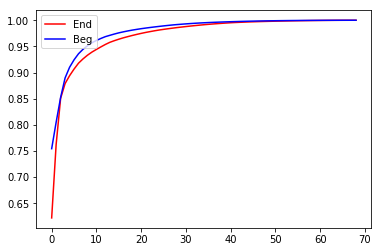

In [107]:
plt.plot(pcend.explained_variance_ratio_.cumsum(), 'r', label='End')
plt.plot(pcbeg.explained_variance_ratio_.cumsum(), 'b', label='Beg')
plt.legend(loc='upper left')